## Plotting the  data


In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data=np.loadtxt('ex1data1.txt',delimiter=',')
X=data[:,0]
y=data[:,1]
m=data.shape[0] #no of examples
print(data.shape)

(97, 2)


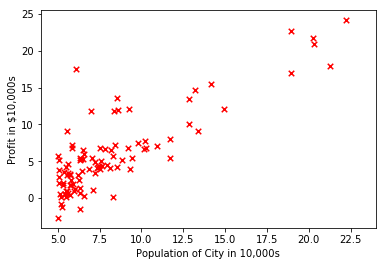

In [46]:
plt.scatter(X,y,s=30,marker='x',c='r',linewidths=1)
plt.xlim(4,24)

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s') 
plt.show()

In [178]:
X = np.c_[np.ones((m, 1)),data[:,0]]# Add a column of ones to x
y= np.c_[data[:,1]]
theta = np.zeros((2, 1)); #initialize fitting parameters
#Some gradient descent settings
iterations = 1500
alpha = 0.01

In [110]:
print(X.shape)
print(theta.shape)
# X.shape[0]
# y.shape
# (y-X.dot(theta)).shape

(97, 2)
(2, 1)


(97, 1)

In [111]:
def compute_cost(X, y, theta):
    h=X.dot(theta)
    return np.sum(np.square(y-h))/(2*(X.shape[0]))

In [224]:
print(compute_cost(X,y,theta))
print(compute_cost(X, y, np.array([[-1 ],[ 2]])))
np.c_[X[:,1]].shape


10527659.0584
54.242455082


(97, 1)

In [285]:
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history=np.zeros((num_iters,1))
    for i in range(num_iters):
        h=X.dot(theta)
        theta=theta-alpha*(X.T.dot(h-y))/(X.shape[0])
        J_history[i] = compute_cost(X, y, theta)
        
    return [J_history,theta]    
        

In [289]:
theta=np.zeros((2, 1))

li = gradient_descent(X, y, theta, alpha, iterations)

In [294]:
theta=li[1]

In [307]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[ 4519.7678677]
[ 45342.45012945]


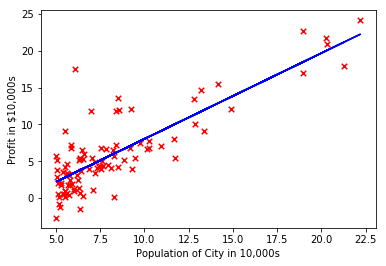

In [319]:
plt.scatter(data[:,0],y,s=30,marker='x',c='r',linewidths=1)
z=theta[0]+theta[1]*data[:,0]
plt.plot(data[:,0],z,c='b')
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s') 
plt.show()

theta:  [-3.63029144  1.16636235]


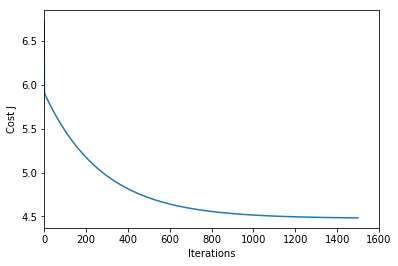

In [321]:
# theta for minimized cost J
plt.close()
plt.close()
theta , Cost_J = li[1],li[0]
print('theta: ',theta.ravel())
plt.xlim(0,1600)
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
plt.show()

In [369]:
theta0_vals = np.linspace(-10, 10, 50)
theta1_vals = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(theta0_vals, theta1_vals , indexing='xy')
# initialize J vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
# Fill out J vals
# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(J_vals):
    J_vals[i,j] = compute_cost(X,y, theta=[[xx[i,j]], [yy[i,j]]])


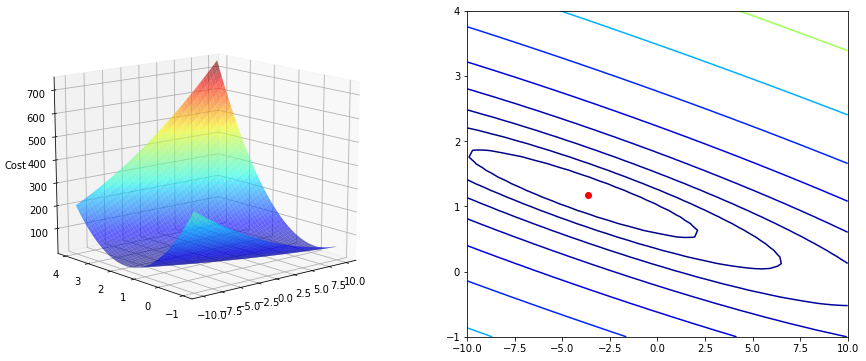

In [389]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
#  Surface plotc
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121, projection='3d')
ax.set_zlabel('Cost')
ax.set_zlim(J_vals.min(),J_vals.max())
ax.view_init(elev=15, azim=230)
ax.plot_surface(xx, yy, J_vals, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
#contour plot
ax1 = fig.add_subplot(122)
CS = ax1.contour(xx,
                 
                 yy, J_vals, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')
fig

In [387]:
plt.close('all')

In [472]:
#Linear regression with multiple variables
data=np.loadtxt('ex1data2.txt',delimiter=',')
X = np.c_[[data[:,0],data[:,1]]].T
y = np.c_[data[:, 2]]
m = len(y)
me=np.c_[np.mean(X,axis=0)]
# sigma=np.c_[np.std(X,axis=0)]
# sigma.shapeprint(X[0])
m

47

In [486]:
# Normalizing features
def featureNormalize(X):
    mu = np.c_[np.mean(X,axis=0)]
    sigma = np.c_[np.std(X,axis=0)]
    first_column=(X[:,0]-mu[0][0])/sigma[0][0]
    second_column=(X[:,1]-mu[1][0])/sigma[1][0]
    return np.c_[first_column,second_column]



In [487]:
 X_norm=featureNormalize(X)

In [488]:
X_norm=np.c_[np.ones((m, 1)),X_norm]
# Choose some alpha value
alpha = 0.01;
num_iters = 400;

X_norm.shape

(47, 3)

In [489]:
theta=np.zeros((3, 1))
nli = gradient_descent(X_norm, y, theta, alpha, num_iters)

In [490]:
nli[1]

array([[ 334302.06399328],
       [  99411.44947359],
       [   3267.01285407]])

theta:  [ 334302.06399328   99411.44947359    3267.01285407]


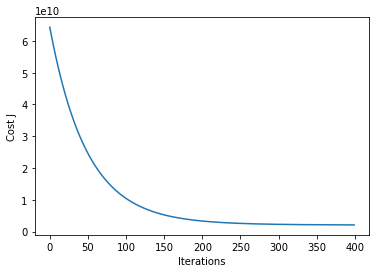

In [492]:
# theta for minimized cost J
plt.close('all')#closing previous plots
import matplotlib.pyplot as plt
theta , Cost_J = nli[1],nli[0]
print('theta: ',theta.ravel())
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
plt.show()

In [494]:
mu = np.c_[np.mean(X,axis=0)]
sigma = np.c_[np.std(X,axis=0)]
print(theta.T.dot([1, (1650-mu[0][0])/sigma[0][0],(3-mu[1][0])/sigma[1][0]]))

[ 289221.54737122]


In [497]:
from numpy.linalg import pinv
plt.close('all')
#using normal eqn theta
n_theta=pinv(X_norm.T.dot(X_norm)).dot(X_norm.T).dot(y)
n_theta.T.dot([1, (1650-mu[0][0])/sigma[0][0],(3-mu[1][0])/sigma[1][0]])

array([ 293081.4643349])